# Pymaceuticals: Capomulin Observations and Insights

Based upon the data below I can draw the following conclusions about the Pymaceuticals testing of the effectiveness of Capomulin against other drugs:

1. The results of the analysis appear to be very consistent and reliable as there is only one outlier in the data set of among the top drugs, and none for the main subject, Capomulin.

2. There is a very direct correlation between mouse weight and tumor size, as seen in the scatter plot data below. This would indicate that Capomulin is less effective as mouse weight increases.

3. Capomulin appears to be as effective as Ramicane, and much more effective than both Infubinol and Ceftamin.

# Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_info = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_data, study_info, how='outer', on='Mouse ID')

# Clean the data removing duplicate data
mouse_data_cleaned_df = mouse_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
mouse_data_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

Mean, Median, Variance, Standard Deviation & Standard Error of the Mean (SEM)

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation and SEM of the tumor volume for each drug regimen

mouse_summary_df = mouse_data_cleaned_df.groupby("Drug Regimen")
mouse_summary_df

# Mean
tumor_volume_mean = mouse_summary_df["Tumor Volume (mm3)"].mean()
# Median
tumor_volume_median = mouse_summary_df["Tumor Volume (mm3)"].median()
# Variance
tumor_volume_var = mouse_summary_df["Tumor Volume (mm3)"].var()
# Standard Deviation
tumor_volume_stdev = mouse_summary_df["Tumor Volume (mm3)"].std()
# SEM
tumor_volume_sem = mouse_summary_df["Tumor Volume (mm3)"].sem()

# Create DataFrame holding all calculations
mouse_summary_grouped_df = pd.DataFrame({"Mean": tumor_volume_mean, "Median": tumor_volume_median, "Variance": tumor_volume_var, "Standard Deviation": tumor_volume_stdev, "SEM": tumor_volume_sem})

mouse_summary_grouped_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Plots

Displaying the number of measurements for each test drug

Text(0.5, 1.0, 'Number of Measurements for Each Treatment Regimen')

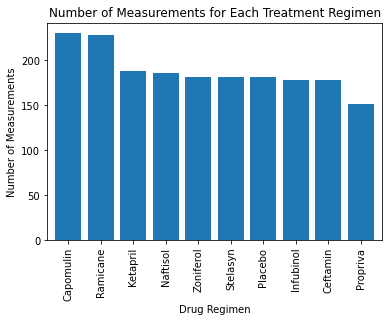

In [3]:
# Generate bar plots that show the total number of measurements taken for each treatment regimen throughout the course of the study
# Plot a bar chart using Pandas based on the amount of measurements for each "Drug Regimen"
bar_plot = mouse_data_cleaned_df["Drug Regimen"].value_counts().plot.bar(width=0.8, zorder=3)

# Set labels
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Number of Measurements for Each Treatment Regimen")

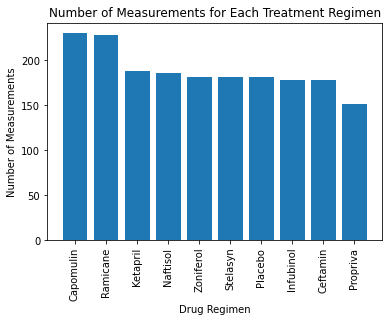

In [4]:
#G enerate bar plots that show the total number of measurements taken for each treatment regimen throughout the course of the study
# Plot a bar chart using PyPlot based on the amount of measurements for each "Drug Regimen"

# Calculate teh number of data points for each regimen
counts = mouse_data_cleaned_df["Drug Regimen"].value_counts()

# Set the x-axis to the length of count
x_axis = np.arange(len(counts))

# Generate the bar chart using the length of counts as the x-axis, and the values as the y-axis
plt.bar(x_axis, counts, width=0.8, zorder=3)

# Label tick marks to change from number values to drug names
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements for Each Treatment Regimen")

plt.show()

# Pie Plots

Determining the gender makeup of the test group

Text(0, 0.5, '')

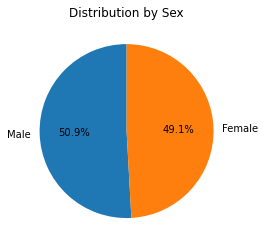

In [5]:
# Generate pie plots that show the distribution of female or male mice in the study
# Plot a pie chart using Pandas based on the sex of the mice
gender_mice = mouse_data_cleaned_df["Sex"].value_counts()

# Plot the pie chart with corresponding percentages
pie_plot = gender_mice.plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution by Sex")

# Hide y label for cleaner look
pie_plot.set_ylabel('')

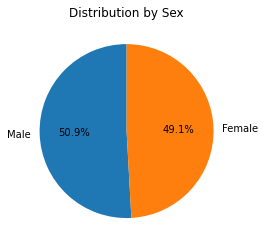

In [6]:
# Generate pie plots that show the distribution of female or male mice in the study
# Plot a pie chart using PyPlot based on the sex of the mice

gender_mice = mouse_data_cleaned_df["Sex"].value_counts()

# Plot the pie chart with corresponding percentages using MatPlotLib
plt.pie(gender_mice, labels=gender_mice.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution by Sex")

plt.show()

# Quartiles Outliers, Boxplot

Analysis of the effectiveness of the top four drugs

In [7]:
# Find max timepoint for each mouse
max_time_df = pd.DataFrame(mouse_data_cleaned_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Max-Timepoint"})
max_time_df

# Merge with cleaned dataframe
merged_mouse_df = pd.merge(mouse_data_cleaned_df, max_time_df, on="Mouse ID")
merged_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max-Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Create a new dataframe with only the top four drug regimens
top_four = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_four_values = []

# Find each from the original dataframe
for drug in top_four:
    mice_df = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == drug]
    
    # Create a dataframe that only includes rows containing the final timepoint
    mice_final_df = mice_df.loc[mice_df["Timepoint"] == mice_df["Max-Timepoint"]]
    
    # Create a list with all final tumor volume values for each regimen
    reg_values = mice_final_df["Tumor Volume (mm3)"]
    top_four_values.append(reg_values)
    
    # Calculate the Interquartile Range (IQR) for each regimen
    quartiles = reg_values.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Print the IQR
    print(f"IQR for {drug}: {iqr}")
    
    # Find upper and lower bounds to identify any outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print the upper and lower bounds for each regimen
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    
    # Quantitatively check for outliers
    outliers_high = reg_values.loc[(mice_final_df["Tumor Volume (mm3)"] >= upper_bound)].count()
    outliers_low =  reg_values.loc[(mice_final_df["Tumor Volume (mm3)"] <= lower_bound)].count()
    outliers_total = outliers_high+outliers_low
    
    # Print the number of outliers
    print(f"Number of {drug} outliers: {outliers_total}")
                

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


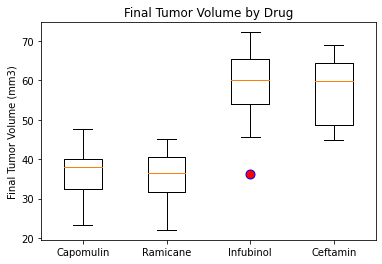

In [9]:
# Generate a box and whisker plot of the final tumor volume for all four treatment regimens
# Highlight any potential outliers in the plot by changing their color and style

flierprops = dict(marker='o', markerfacecolor='r', markersize=9, markeredgecolor='blue')

plt.boxplot(top_four_values, flierprops=flierprops)

plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
          
plt.show()

# Line Plot

Analysis of the tumor volume over the sample period for a single mouse using drug regimen Capomulin

In [10]:
# Generate a line plot of tumor volume vs. time point for a mouse that was treated with Capomulin
# Print a list of mice tested with Capomulin

mice_Capomulin_df = mouse_data_cleaned_df.loc[(mouse_data_cleaned_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Drug Regimen"]]
print(mice_Capomulin_df)

     Mouse ID Drug Regimen
10       s185    Capomulin
11       s185    Capomulin
12       s185    Capomulin
13       s185    Capomulin
14       s185    Capomulin
...       ...          ...
440      i557    Capomulin
1452     r157    Capomulin
1453     r157    Capomulin
1454     r157    Capomulin
1455     r157    Capomulin

[230 rows x 2 columns]


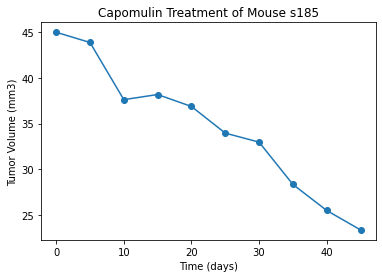

In [11]:
# Generate a line plot of tumor volume vs. time point for a mouse that was treated with Capomulin
# Identify a single mouse treated with Capomulin

single_mouse = mouse_data_cleaned_df.loc[mouse_data_cleaned_df["Mouse ID"] == "s185"]

# Plot a line chart with time value on x-axis and tumor volume on y-axis
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker='o')

# Add labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

# Scatter Plots

Measuring Capomulin effectiveness by analyzing tumor volume vs. mouse weight of all mice given that regimen

In [12]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin treatment regimen
# Identify mice treated with Capomulin

mice_Capomulin_df = mouse_data_cleaned_df.loc[(mouse_data_cleaned_df["Drug Regimen"] == "Capomulin")]
mice_Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


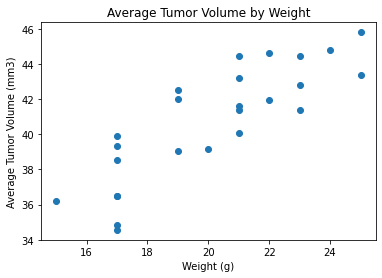

In [13]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin treatment regimen
# Calculate avg tumor vol for mice

avg_tumor_vol_df = pd.DataFrame(mice_Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})

# Merge into dataframe
avg_tumor_vol_df = pd.merge(mice_Capomulin_df, avg_tumor_vol_df, on="Mouse ID")

# Drop duplicate entries to remove unnecessary plot points
avg_tumor_vol_final_df = avg_tumor_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
avg_tumor_vol_final_df

# Create variables
x = avg_tumor_vol_final_df["Weight (g)"]
y = avg_tumor_vol_final_df["avg_tumor_vol"]

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()

The correlation between weight and average tumor volume with the Capomulin regimen is 0.84.


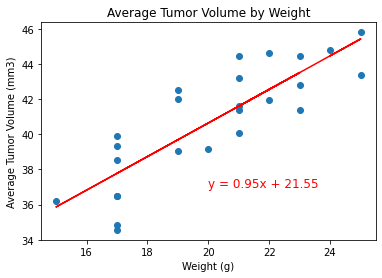

In [14]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment
# Plot the linear regression model on top of the previous scatter plot.

# Duplicate scatter plot code from above
mice_Capomulin_df = mouse_data_cleaned_df.loc[(mouse_data_cleaned_df["Drug Regimen"] == "Capomulin")]
avg_tumor_vol_df = pd.DataFrame(mice_Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})

# Merge average tumor volume with original dataframe and drop duplicate rows to remove unnecessary plots 
avg_tumor_vol_df = pd.merge(mice_Capomulin_df, avg_tumor_vol_df, on="Mouse ID")
avg_tumor_vol_final_df = avg_tumor_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()

# Create variables based on column data
x = avg_tumor_vol_final_df["Weight (g)"]
y = avg_tumor_vol_final_df["avg_tumor_vol"]

# Calculate the correlation coefficient between mouse weight and tumor vol
correlation = st.pearsonr(x, y)

# Print the answer to the calculation
print(f"""The correlation between weight and average tumor volume with the Capomulin regimen is {round(correlation[0] ,2)}.""")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear reggression on top of scatter plot
plt.scatter(x, y)
plt.plot(x, regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()